## 1. IMPORTANDO AS BIBLIOTECAS E OS DADOS DE TREINO E TESTE 

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

# Lendo os dados de treino e teste da pasta que estão salvos na pasta Dados_Treino_Teste
caminho_dados = '../Dados_Treino_Teste'
X_treino = pd.read_csv(f'{caminho_dados}/X_treino.csv')
X_teste = pd.read_csv(f'{caminho_dados}/X_teste.csv')
y_treino = pd.read_csv(f'{caminho_dados}/y_treino.csv').squeeze()
y_teste = pd.read_csv(f'{caminho_dados}/y_teste.csv').squeeze()


## 2. TREINANDO O MODELO DE REGRESSÃO LOGÍSTICA 

       Verdadeiro  Predição
0             1.0       1.0
1             0.0       0.0
2             1.0       1.0
3             0.0       0.0
4             1.0       1.0
...           ...       ...
88162         1.0       1.0
88163         0.0       0.0
88164         0.0       0.0
88165         0.0       1.0
88166         0.0       0.0

[88167 rows x 2 columns]

Acurácia: 0.8944 — Proporção de acertos gerais do modelo.
Precisão: 0.9232 — Proporção de acertos entre as previsões positivas.
Recall: 0.8875 — Capacidade de encontrar todos os positivos reais.
F1-score: 0.9050 — Equilíbrio entre precisão e recall.


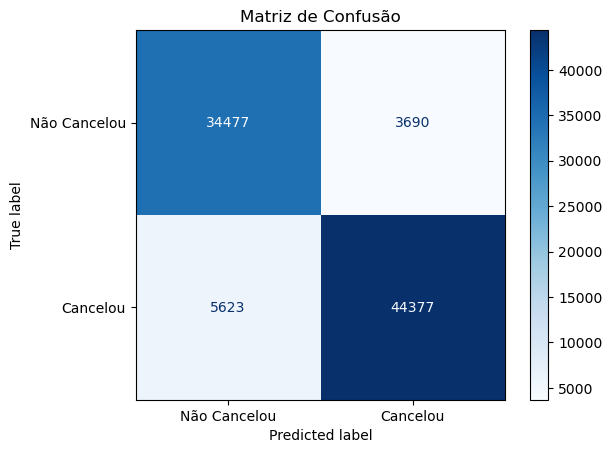

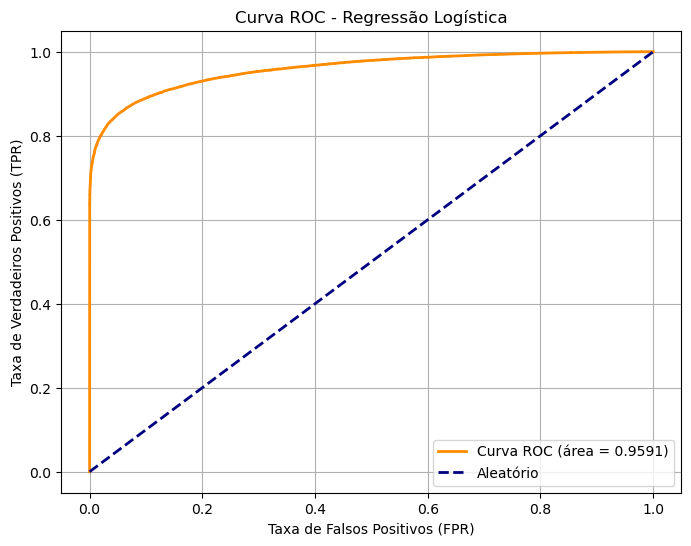

In [7]:
# Criando e treinando o modelo de Regressão Logística
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_treino, y_treino)

# Fazendo previsões no modelo treinado
y_pred = modelo_logistico.predict(X_teste)

# Criando um DataFrame para comparar as previsões com os valores reais
df_resultado = pd.DataFrame({'Verdadeiro': y_teste, 'Predição': y_pred})
print(df_resultado)

# Avaliação com as métricas

#A acurácia mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.
# Quanto mais alta a acurácia, melhor o desempenho do modelo em fazer previsões precisas
accuracy = accuracy_score(y_teste, y_pred)

# A precisão se concentra em quão precisas são as previsões positivas do modelo. 
#A precisão é uma métrica importante, especialmente em casos em que prever falsos positivos é indesejável
#Quanto maior a precisão, melhor o modelo é em evitar previsões positivas incorretas.
precision = precision_score(y_teste, y_pred)

# O recall se concentra em quão bem o modelo é capaz de capturar todas as instâncias positivas do conjunto de dados.
# O recall é uma métrica importante, especialmente em situações em que a não detecção de instâncias positivas (falsos negativos) é indesejável. 
# Quanto maior o recall, melhor o modelo é em identificar corretamente as instâncias positivas.
recall = recall_score(y_teste, y_pred)

#F1_Score é uma métrica que combina a precisão (proporção de previsões positivas corretas) e o recall (proporção de instâncias positivas reais que foram corretamente identificadas pelo modelo) em um único valor.
# Essa métrica fornece um equilíbrio entre precisão e recall.
#Um valor alto de F1-Score indica um equilíbrio positivo entre a precisão e o recall do modelo.
f_score = f1_score(y_teste, y_pred)

print(f"\nAcurácia: {accuracy:.4f} — Proporção de acertos gerais do modelo.")
print(f"Precisão: {precision:.4f} — Proporção de acertos entre as previsões positivas.")
print(f"Recall: {recall:.4f} — Capacidade de encontrar todos os positivos reais.")
print(f"F1-score: {f_score:.4f} — Equilíbrio entre precisão e recall.")


# Calculando a matriz de confusão
matriz = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Não Cancelou", "Cancelou"])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

# CURVA ROC 

# Probabilidades da classe positiva
y_probs = modelo_logistico.predict_proba(X_teste)[:, 1]

# Calculando os valores da Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_probs)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 3. VALIDAÇÃO CRUZADA

In [8]:

# Lendo os dados de treino e teste da pasta onde estão salvos
caminho_dados = '../Dados_Treino_Teste'
X_treino = pd.read_csv(f'{caminho_dados}/X_treino.csv')
X_teste = pd.read_csv(f'{caminho_dados}/X_teste.csv')
y_treino = pd.read_csv(f'{caminho_dados}/y_treino.csv').squeeze()
y_teste = pd.read_csv(f'{caminho_dados}/y_teste.csv').squeeze()

# Unificando os dados de treino para usar na validação cruzada
X = pd.concat([X_treino, X_teste], axis=0)  # Junta X_treino e X_teste
y = pd.concat([y_treino, y_teste], axis=0)  # Junta y_treino e y_teste

# Criando e configurando o modelo de Regressão Logística
modelo_logistico = LogisticRegression(max_iter=1000)

# Valudando as métricas de acurácia, recall, f1 e precision

metricas = ['accuracy', 'precision', 'recall', 'f1']

resultado = cross_validate(
    modelo_logistico,
    X,
    y,
    cv=5,
    scoring=metricas,
    return_train_score=False
)

# Criando o DataFrame com resultados
df_resultados = pd.DataFrame({
    'Métrica': [],
    'Média': [],
    'Desvio Padrão': []
})

for metrica in metricas:
    scores = resultado[f'test_{metrica}']
    media = np.mean(scores)
    desvio = np.std(scores)
    
    df_resultados = pd.concat([
        df_resultados,
        pd.DataFrame({'Métrica': [metrica],
                      'Média': [f'{media:.4f}'],
                      'Desvio Padrão': [f'{desvio:.4f}']})
    ], ignore_index=True)

# Exibindo o DataFrame
print(df_resultados)


     Métrica   Média Desvio Padrão
0   accuracy  0.8953        0.0009
1  precision  0.9251        0.0012
2     recall  0.8873        0.0009
3         f1  0.9058        0.0007


## 4. SALVANDO O MODELO REGRESSÃO LOGISTICA 

In [9]:
import joblib

# Salvar o modelo treinado
joblib.dump(modelo_logistico, 'modelo_logistico.pkl')

# Carregar o modelo treinado
modelo_carregado = joblib.load('modelo_logistico.pkl')
